Q3

In [2]:
!pip install apriltag


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for apriltag: filename=apriltag-0.0.16-cp310-cp310-linux_x86_64.whl size=506899 sha256=b5da8e33c02e290a4b2d970cd25fcd226b0c10c22d6903c717ddc59848a2276d
  Stored in directory: /root/.cache/pip/wheels/06/b0/0f/31eead0216b5f1df61d62733b48d7c2247912bfe64808f8ea5
Successfully built apriltag


In [3]:
import numpy as np
import cv2
import apriltag


In [5]:
calibration_images = []  # List to store calibration images

# Add your calibration image paths here
image_paths = [ '/content/Image1.jpg', '/content/Image2.jpg', '/content/Image3.jpg', '/content/Image4.jpg', '/content/Image5.jpg', \
                           '/content/Image6.jpg', '/content/Image7.jpg', '/content/Image8.jpg', '/content/Image9.jpg', '/content/Image10.jpg', \
                            '/content/Image11.jpg', '/content/Image12.jpg']

# Load calibration images
for path in image_paths:
    img = cv2.imread(path)
    calibration_images.append(img)


1.  Define the path where the images are stored
2.  Go through the images 1 by 1 and append the images in the empty list initiated in the beginning calibration_images

In [6]:
pattern_rows = 6  # Number of rows in the calibration pattern
pattern_cols = 9  # Number of columns in the calibration pattern


Calibration is being done using a calibration board with a checkrboard pattern.

The cv2 algorithm requires that we define the pattern in terms of its rows and columns.

In our case the pattern has 6 rows and 9 columns.

In [7]:
object_points = []  # List to store object points (3D)
image_points = []   # List to store image points (2D)


You create two empty lists: object_points to store the 3D world coordinates of calibration points, and image_points to store the 2D pixel coordinates of the detected points in the images.

In [8]:
pattern_points = np.zeros((pattern_rows * pattern_cols, 3), np.float32)
pattern_points[:, :2] = np.mgrid[0:pattern_cols, 0:pattern_rows].T.reshape(-1, 2)


In this step, you generate the object points for the calibration pattern. The object points are the known 3D coordinates of the calibration pattern. For example, for a checkerboard pattern, you initialize a grid of zeros with np.zeros and assign the X and Y coordinates of the grid. The Z-coordinates are set to zero because it's a 2D pattern.

Let's break down the code step by step:

pattern_points is initialized as a NumPy array of shape (pattern_rows * pattern_cols, 3) with all elements initialized to zeros. This array will store the 3D world coordinates of the corners.

pattern_points[:, :2] selects the first two columns of pattern_points, which correspond to the X and Y coordinates of the corners in the 3D world space. These coordinates are initialized to zeros initially.

np.mgrid[0:pattern_cols, 0:pattern_rows] creates a grid of points in the X and Y directions. The mgrid function generates two 2D arrays: one for the X-coordinates and another for the Y-coordinates. This essentially creates a grid of points corresponding to the corners of a checkerboard or grid pattern.

.T transposes the grid arrays, swapping rows and columns, so that the X and Y coordinates are properly aligned.

.reshape(-1, 2) reshapes the transposed grid into a 2D array with two columns. The -1 argument in reshape means that the number of rows is automatically calculated based on the total number of elements in the array. This step is necessary to convert the grid into a flat list of 2D coordinates.

The final result is that pattern_points contains a set of 3D world coordinates where the X and Y values correspond to the grid of corners in the calibration pattern (e.g., a checkerboard). The Z values are all initialized to zero because the calibration pattern is assumed to lie in a plane (i.e., no depth variation). These world coordinates are used in camera calibration to find the camera's intrinsic parameters, including the camera matrix (K), by capturing images of the calibration pattern from different viewpoints and detecting the 2D image coordinates of the pattern's corners.

In [9]:
for img in calibration_images:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (pattern_cols, pattern_rows), None)

    if ret:
        object_points.append(pattern_points)
        image_points.append(corners)


This step involves detecting the corners of the calibration pattern in each calibration image. You iterate through the loaded images and perform the following:
Convert the image to grayscale (cv2.cvtColor) because corner detection functions often work with grayscale images.
Use cv2.findChessboardCorners to detect the corners of the calibration pattern in the grayscale image. If corners are detected (ret is True), you add the corresponding object points (3D) and image points (2D) to their respective lists.

In [11]:
# Get image dimensions
image_shape = gray.shape[::-1]

# Perform camera calibration
ret, K, distortion, rvecs, tvecs = cv2.calibrateCamera(object_points, image_points, image_shape, None, None)
k1, k2, *_ = distortion.ravel()  # Extract the top two distortion parameters


With the collected object points and image points, you perform the camera calibration using cv2.calibrateCamera. This function estimates the camera matrix (K) and distortion parameters based on the known 3D-to-2D correspondences. You also extract the top two distortion parameters, k1 and k2.

In [87]:
print("Camera Matrix (K):")
print(K)
print("Distortion Parameters (k1, k2):")
print(k1, k2)

Camera Matrix (K):
[[2.09862213e+03 0.00000000e+00 1.15512024e+03]
 [0.00000000e+00 2.10149813e+03 7.81509956e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion Parameters (k1, k2):
0.024360057477338787 0.6431001054247808
(12, 3, 1)


Finally, you print the results of the camera calibration, including the camera matrix (K) and the top two distortion parameters (k1, k2). These results provide the essential information needed to correct distortions and project 3D points onto 2D images.

Q4

(array([[[364., 501.],
        [385., 433.],
        [462., 461.],
        [445., 530.]]], dtype=float32),) [[23]]


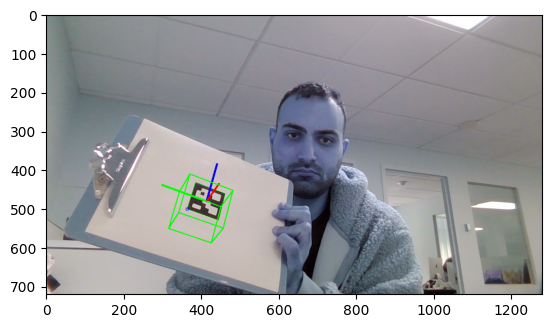

In [154]:
import cv2
from cv2 import aruco
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/aruco_marker8.jpg')

# Load the ArUco dictionary (you can choose a different dictionary type)
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)

# Initialize the detector parameters
parameters = cv2.aruco.DetectorParameters()

detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)


# Detect ArUco markers in the image
corners, ids, _ = detector.detectMarkers(image)
print(corners,ids)
if ids is not None:
    for i in range(len(ids)):
        # Draw the detected ArUco marker
        aruco.drawDetectedMarkers(image, corners)

        # Estimate the pose of the detected marker
        rvec, tvec, _ = aruco.estimatePoseSingleMarkers(corners[i], 0.07, K, None)

        # Draw a 3D cube on top of the detected marker
        cv2.drawFrameAxes(image, K, None, rvec, tvec, 0.1)

        # Define the 3D coordinates of the cube corners
        cube_points = np.float32([[-0.05, -0.05, 0], [-0.05, 0.05, 0], [0.05, 0.05, 0], [0.05, -0.05, 0],
                                  [-0.05, -0.05, -0.1], [-0.05, 0.05, -0.1], [0.05, 0.05, -0.1], [0.05, -0.05, -0.1]])

        # Project the 3D cube points onto the 2D image plane
        cube_2d, _ = cv2.projectPoints(cube_points, rvec, tvec, K, None)

        # Draw lines between the cube's vertices to form the cube
        lines = [[0, 1], [1, 2], [2, 3], [3, 0],
                 [4, 5], [5, 6], [6, 7], [7, 4],
                 [0, 4], [1, 5], [2, 6], [3, 7]]

        for line in lines:
            start_point = tuple(cube_2d[line[0]].astype(int).ravel())
            end_point = tuple(cube_2d[line[1]].astype(int).ravel())
            cv2.line(image, start_point, end_point, (0, 255, 0), 2)

# Save or display the image with the 3D cube on top of the detected ArUco marker
cv2.imwrite('output_image.jpg', image)
plt.imshow(image, cmap='gray')



This is the whole code.

The code is repeated below for step by step explanation.

In [155]:
import cv2
from cv2 import aruco
import numpy as np
import matplotlib.pyplot as plt


This code segment imports the necessary libraries: OpenCV (cv2) for computer vision tasks, the aruco module for working with ArUco markers, numpy for numerical operations, and matplotlib.pyplot for displaying the image.

In [156]:
image = cv2.imread('/content/aruco_marker8.jpg')


This line loads an image from the specified file path ('/content/aruco_marker2.jpg') into the image variable. This image is assumed to contain ArUco markers.

In [157]:
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)


It loads the predefined ArUco dictionary (DICT_6X6_250). ArUco dictionaries define the patterns used for marker detection.

In [158]:
parameters = cv2.aruco.DetectorParameters()


This line initializes the detector parameters for ArUco marker detection. You can fine-tune these parameters based on your specific needs, but the default values are usually sufficient for most applications.

In [159]:
corners, ids, _ = cv2.aruco.detectMarkers(image, aruco_dict, parameters=parameters)


Here, the code detects ArUco markers in the loaded image using the cv2.aruco.detectMarkers function. It returns corners (corner coordinates), ids (marker IDs), and _ (rejectedImgPoints, which we don't use here).

In [160]:
if ids is not None:
    for i in range(len(ids)):
        # Draw the detected ArUco marker
        aruco.drawDetectedMarkers(image, corners)

        # Estimate the pose of the detected marker
        rvec, tvec, _ = aruco.estimatePoseSingleMarkers(corners[i], 0.07, K, None)

        # Draw a 3D cube on top of the detected marker
        cv2.drawFrameAxes(image, K, None, rvec, tvec, 0.1)

        # Define the 3D coordinates of the cube corners
        cube_points = np.float32([[-0.05, -0.05, 0], [-0.05, 0.05, 0], [0.05, 0.05, 0], [0.05, -0.05, 0],
                                  [-0.05, -0.05, -0.1], [-0.05, 0.05, -0.1], [0.05, 0.05, -0.1], [0.05, -0.05, -0.1]])

        # Project the 3D cube points onto the 2D image plane
        cube_2d, _ = cv2.projectPoints(cube_points, rvec, tvec, K, None)

        # Draw lines between the cube's vertices to form the cube
        lines = [[0, 1], [1, 2], [2, 3], [3, 0],
                 [4, 5], [5, 6], [6, 7], [7, 4],
                 [0, 4], [1, 5], [2, 6], [3, 7]]

        for line in lines:
            start_point = tuple(cube_2d[line[0]].astype(int).ravel())
            end_point = tuple(cube_2d[line[1]].astype(int).ravel())
            cv2.line(image, start_point, end_point, (0, 255, 0), 2)

This loop iterates over the detected markers. Inside the loop, it draws the detected markers on the image using `cv2.aruco.drawDetectedMarkers`.

For each detected marker, it estimates the pose (position and orientation) using cv2.aruco.estimatePoseSingleMarkers. rvec is the rotation vector, and tvec is the translation vector.
cv2.aruco.drawAxis is used to draw the marker's frame axes based on the estimated pose. It helps visualize the marker's orientation in 3D space.

Line 13 'cube_points = ...'  defines the 3D coordinates of the cube's eight corners. These coordinates are specified in meters and represent the cube's size and position relative to the marker.

cv2.projectPoints projects the 3D cube coordinates (cube_points) onto the 2D image plane based on the estimated pose (rvec and tvec) and the camera matrix (K). This step maps the 3D cube onto the image.

In the section starting at line 20 'lines = ... ' to the end of the block, a list of line segments (lines) is defined to connect the cube's eight vertices. It loops through each line segment, calculates the 2D start and end points based on the projected cube coordinates, and draws a green line on the image.

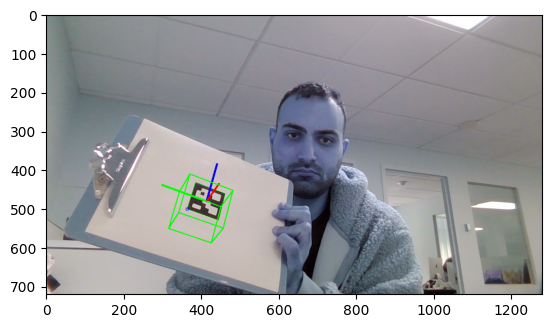

In [161]:
cv2.imwrite('output_image.jpg', image)
plt.imshow(image, cmap='gray')
plt.show()


Finally, the modified image with the cube and frame axes drawn on the detected ArUco marker is either saved as 'output_image.jpg' or displayed using matplotlib.

This code combines for Q4 ArUco marker detection, pose estimation, and 3D cube projection to create an augmented reality visualization on top of the detected markers. Make sure to adjust the cube's size and color to fit your specific requirements.